### Using the unknown bacterium DNA for SPAdes analysis 
1. locate the location of the files (- cd /data/lab8)  
folder contains  
1.illumina_reads_R1.fastq – first paired-end read  
2.illumina_reads_R2.fastq – second paired-end read  
3.pacbio_reads.fastq – long PacBio reads

SPAdes is a hybrid genome assembler, meaning that it takes multiple sources of information as
input and combines them to produce an optimal assembly.Assemblies using only short reads
tend to be highly fragmented (i.e., many contigs). Assemblies using a high-quality short read set and a higher error rate long-read set (like PacBio) tend to be the best.

2. using the SPAdes command line as shown below:  
***spades -t 1 -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq  -o /home/be131-03/snow/lab8***

annotation of the code above:
specify the output directory with --o, the path to the first Illumina read with -1, the path to the second Illumina read with -2, and the path to your PacBio reads with --pacbio.

3. using the command control+A+D, the screen will continue running even logged off

##### Analysis:
We expect short reads to produce a more fragmented assembly than long reads, since the the reads are small and arbitrary, on the opposite, the long reads are much more condensed and coherent less likely to be broken up assembly.

A single-molecule sequencing like PacBio have a higher error rate than Illumina. Because PacBio read the long-read sets which may be less thorough with sequencing. Illumina reasd the smaller sequences and create multiply contiguous sequences.However, for creating scaffolds, having more coverage is preferable to higher accuracy.



### Generate assembly statistics
After the SPAdes runs, there are two files. "Contigs.fasta" are contiguous sequences that could be assembled from your reads. "Scaffolds.fasta" are sets of contigs that have been stitched together in order, and are generally longer than contigs.

Using the assembly-stats program to calculate statistics on both your contigs and
scaffolds file.
##### Result:
stats for contigs.fasta  
sum = 6678635, n = 176, ave = 37946.79, largest = 414008  
N50 = 234690, n = 11  
N60 = 202142, n = 14  
N70 = 154232, n = 18  
N80 = 103367, n = 23  
N90 = 81286, n = 30  
N100 = 128, n = 176  
N_count = 0  
Gaps = 0

***total length of all contigs is 6678635 bp, the number of contigs (or scaffolds) is 176, and the N50 is 234690, n=11.***

stats for scaffolds.fasta  
sum = 6678655, n = 174, ave = 38383.07, largest = 414008  
N50 = 234690, n = 11  
N60 = 202142, n = 14  
N70 = 154232, n = 18  
N80 = 103367, n = 23  
N90 = 81821, n = 30  
N100 = 128, n = 174  
N_count = 20  
Gaps = 2  
***the total length of all scaffolds is 6678655 bp, the number of scaffolds is 174, and the N50 is 234690, n=11.***

#### Analysis:

the N50 is defined as the sequence length of the shortest contig at 50% of the total genome length.It gives more possible combinations in the total genome pool of contigs. It also gives higer weights to the longer contig but at the same time not ignore the shorter chains 


The scaffolds approximately equals to the contigs. the value is making sense since there are only two gaps in the scaffolds 


#### Extra Credit: 
The number of times a contig in your assembly was covered by the reads used to
assemble it (“coverage”) is listed at the end of the contig name in contigs.fasta. Extract the
coverage from each FASTA header and plot a histogram of coverage for all contigs in your
assembly.

In [37]:
from Bio import SeqIO
import matplotlib.pyplot as plt
coverages=[]
for record in SeqIO.parse("contigs.fasta", "fasta"):
    coverages.append(float(record.id.split('_')[5]))
#print(coverages)


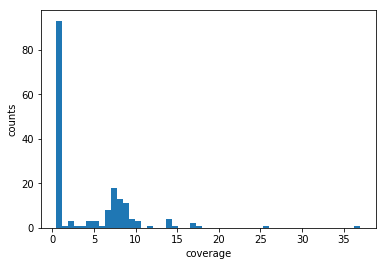

In [38]:
plt.hist(coverages[0:len(coverages)-2],50)
plt.ylabel('counts')
plt.xlabel('coverage')
plt.show()

Analysis:
    The result is bimodal distribution ( extreme value distribution). Most coverages occure within 10. The mean coverage is about 1.5. But there are few exceptional points exist at 25 and 32. 
    

### Identify the taxon from which your genome originated
Much of the gene is highly conserved, as function ribosomes are required for protein synthesis, but some regions differ greater between bacterial taxa. These “hypervariable regions” can be used to determine the taxon from which a 16S rRNA gene originated.

To identify your genome, you must   
##### 1) scan over the entire genome to locate copies of the 16S ribosomal RNA gene

run the rna_hmm3.py program on your assembled contigs to locate rRNA genes. Must
specify a path to the input assembly with -i and a path to the output General Feature Format
(GFF) annotation file with -o.
After this program completes, manually delete all lines within other than those containing 16S_rRNA genes.

The code used in the terminal is     

*rna_hmm3.py -i contigs.fasta -o contigs.gff*

##### 2) extract the 16S rRNA genes from your assembly  
use bedtools getfasta to extract nucleic acid sequences of the 16S rRNA gene.Specify the path to contigs.fasta with -fi and the path to the GFF file you obtained above, with -bed.

The code used in the terminal is    

*getfasta -fi contigs.fasta -bed output_16S_rRNA.gff -fo rRNAgene.fasta*

##### 3) compare these genes to a database of known 16S rRNA genes.  
the resulting FASTA file from the previous step uploads into the Ribosomal Database Project’s SeqMatch tool to identify the 16S sequences as precisely as possible by comparing them to a database from known bacteria.

#### Result:
NODE_23_length_103367_cov_10.081286:35530-37075
rootrank Root (1) (query sequences)

    domain Bacteria  (1)   

        phylum "Proteobacteria"  (1)  

           class Gammaproteobacteria  (1)      

             order Pseudomonadales  (1)     

                family Pseudomonadaceae  (1)      

                   genus Pseudomonas  (1)      
NODE_18_length_154232_cov_9.584186:124541-126086
rootrank Root (1) (query sequences)

    domain Bacteria  (1)      

        phylum "Proteobacteria"  (1)     

          class Gammaproteobacteria  (1)       

             order Pseudomonadales  (1)       

                family Pseudomonadaceae  (1)       

                 genus Pseudomonas  (1)      
NODE_5_length_327223_cov_9.241629:46285-47830
rootrank Root (1) (query sequences)

    domain Bacteria  (1)      

        phylum "Proteobacteria"  (1)      

           class Gammaproteobacteria  (1)     

             order Pseudomonadales  (1)      

                 family Pseudomonadaceae  (1)      

                     genus Pseudomonas  (1)       
NODE_6_length_298784_cov_8.918606:13925-15470
rootrank Root (1) (query sequences)

    domain Bacteria  (1)      

        phylum "Proteobacteria"  (1)      

          class Gammaproteobacteria  (1)      

             order Pseudomonadales  (1)      

                family Pseudomonadaceae  (1)      

                   genus Pseudomonas  (1)        
NODE_4_length_332509_cov_9.114046:137011-138556
rootrank Root (1) (query sequences)

    domain Bacteria  (1)       

       phylum "Proteobacteria"  (1)      

          class Gammaproteobacteria  (1)       

             order Pseudomonadales  (1)       

                family Pseudomonadaceae  (1)      

                   genus Pseudomonas  (1)        
NODE_2_length_378948_cov_10.006665:348499-350044
rootrank Root (1) (query sequences)

    domain Bacteria  (1)      
   
        phylum "Proteobacteria"  (1)      

          class Gammaproteobacteria  (1)      

             order Pseudomonadales  (1)       

                family Pseudomonadaceae  (1)      

                   genus Pseudomonas  (1) 

#### Analysis: 
According to the results above, we used 6 16S rRNA to test. All of them are coming from the  Pseudomonas genus level. For the species level,it is hard to determine which exact species it comes from based on the just one rRNA sequence. The result listed 20 possible species. 

### Genome annotation
look inside the genome and determine with high confidence whether it contains genes necessary to produce a cell wall, or virulence factors enabling the infection of an animal host. 

1. Using Genome annotation,it breaks the long genome sequence into genes, then identify their function by identifying orthologs with known function in other, more well-studied genomes

- two remote annotation services that will perform the annotation automatically: RAST and BASys.

#### Result:

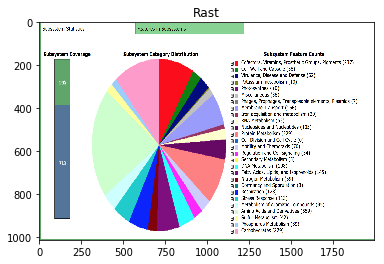

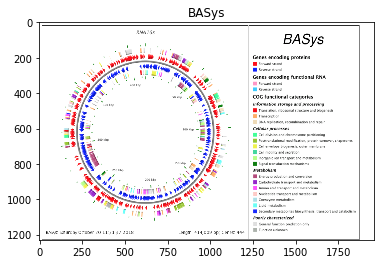

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("Rast.png")
imgplot=plt.imshow(img, aspect='auto')
plt.title('Rast')
plt.show()

img=mpimg.imread("BASys.png")
imgplot=plt.imshow(img,aspect="auto")
plt.title('BASys')
plt.show()



#### Research and write-up

Using the Ribosomal Database Project’s SeqMatch tool, we had identified that the unknown bacteria potentially comes from the genus level of Pseudomonas. Pseudomonas is a gram-negative stained bacteria. From the RAST result, the unknown bacteria shows that it has the total length of 6,678,635 bp, a GC content of 58.7%, and N50 of 234690 and L50 of 11. The total number of the contigs with PEGs is 176. There are 393 subsystems, 6352 coding sequences and 85 RNAs.

The subsystem coverage in overall is 29%. Saying the feature that are encoded by the genome, the largest percentage is the amino acid and its derivatives, containing the polyamines metabolism, urea cycle and arginine biosynthesis extended. The second largest group is the carbohydrates, including multiple carbohydrate metabolism pathways, fermentation and one-carbon metabolism. and the third largest is the cofactors, vitamins, prosthetic groups, and pigments, including biotin and thiamin biosynthesis, lipoic acid metabolism and so on. The tested bacteria has no pathways encoded for the photosynthesis. 

Members of the genus Pseudomonas inhabit a wide variety of environments, which is reflected in their versatile metabolic capacity and broad potential for adaptation to fluctuating environmental conditions[1]. Horizontal gene transfer has impacted the capability of pathogenic Pseudomonas spp. in terms of disease severity and specificity. For example, Genes most likely to be required for nitrogen fixation and rhizosphere competence were identified in a 49-kb region containing 59 genes in Psedomonas. stutzeri A1501, which, based on the G-C content, was postulated to be a GI acquired through horizontal transfer, and inserted between cobS (PST_1301) and PST_1360. 

The pseudomonas genome has high probability of encoding antibiotics resistance genes that inhibit the antibiotics activation. One study has determined that Pseudomonas aeruginosa can live in a biofilm mode within hypoxic mucus in the airways of patients with cystic fibrosis (CF) [2]. The biofilm leads to the result of multi- antibiotic resistance.  The mechanism behind this event is that the coded protein enzyme β-lactamase or penicillinase can hydrolyze the β-lactam ring of the antibiotics and penicillin, as the result, the antibiotics and penicillin become inactivation. In the paper, the research introduces the idea of using a metallo-complex, desferrioxamine-gallium (DFO-Ga) that targets P. aeruginosa iron metabolism. The use of DFO-Ga as a horse delivery system that interferes with iron metabolism shows promise as a treatment for P. aeruginosa infections.


Reference:  
[1] Silby, Mark W., et al. "Pseudomonas genomes: diverse and adaptable." FEMS microbiology reviews 35.4 (2011): 652-680.  

[2] Banin, Ehud, et al. "The potential of desferrioxamine-gallium as an anti-Pseudomonas therapeutic agent." Proceedings of the National Academy of Sciences 105.43 (2008): 16761-16766.
